In [10]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import string
import emoji
import pandas as pd
import re, string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

ps = nltk.PorterStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings("ignore")

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

#

[nltk_data] Downloading package wordnet to /Users/hasana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hasana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/hasana/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
### REad data

In [12]:
data = pd.read_csv('../data/train.csv')

In [13]:
data.head()

,worker_id,task_id,task_response_id,is_reviewed,review_score,tweet_id,text,username,bio,Categorize the tweet
0,4TG67HVWJNDP,909fc038-d4fd-45f0-b849-d975760f163d,02dcb39a-c525-418a-9198-5c08d354935a,True,NaN,1540795861126352898,It getting pregnant endangers your life......\...,AChristhope,Humankind is neither humane nor kind. Creator ...,Pro-life
1,2AZWNZRTVACE,0dcd0bda-127d-4b57-a479-08efc85fb902,031abcc4-deb2-42b2-8b36-979f77d006c6,False,NaN,1540784525864669186,@bluekat323 @leighmatsell @caambers @Robthefro...,LegalLatino2022,Left January 2021. Starting anew. Love all ani...,Pro-life
2,6CNHTCG6W6XM,8617b170-4d3a-4789-b020-c51c0ce1e7c9,035e1a0b-fec5-4c88-81a4-6a79ba4c1d2f,False,NaN,1540795218097688576,@JoeBiden Dont you have the power to make an e...,Sploiv,i dont fuckin know anymore,Pro-choice
3,7R2NKCJQNXPP,851318f8-7671-4f45-9a98-58ebe7013de1,037c1004-9dd9-4bce-a792-adffb278be86,False,NaN,1540795712610258944,https://t.co/2vL1gxc3P3,AuntyLush,Judge jury and old joyce ~~ She/her,Pro-choice
4,X6P6DQRXD62A,a42881d0-a01a-4c7c-acfa-9d21434b59b0,03d7bc4f-4fd0-4658-bf0f-3151150d6d41,False,NaN,1540796129725427715,The overturning of Roe was not an attack on wo...,parlermaid,NaN,Pro-life


In [14]:
data.columns

Index(['worker_id', 'task_id', 'task_response_id', 'is_reviewed',
       'review_score', 'tweet_id', 'text', 'username', 'bio',
       'Categorize the tweet'],
      dtype='object')

### Select columns ot work with

In [15]:
df = data[[ 'is_reviewed','text', 'username', 'bio', 'Categorize the tweet']]

In [21]:
df =df.rename(columns = {"Categorize the tweet": "sentiments"})

In [22]:
df.describe()

,is_reviewed,text,username,bio,sentiments
count,1025,1025,1025,866,1025
unique,2,1025,1024,865,2
top,False,It getting pregnant endangers your life......\...,Chrismikoichi,looking to build up a following . I'll follow ...,Pro-choice
freq,1014,1,2,2,744


In [23]:
temp = df.groupby('sentiments').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiments,text
0,Pro-choice,744
1,Pro-life,281


### Distribution of word counts

In [31]:
df['Num_word_text'] = df['text'].apply(lambda x:len(str(x).split())) 

In [32]:
df[df.sentiments == 'Pro-life']['Num_word_text']

0       18
1       13
4       21
7       20
8       16
        ..
1003    25
1004    17
1008    15
1009    22
1016    20
Name: Num_word_text, Length: 281, dtype: int64

In [36]:
data1 = df[df.sentiments == 'Pro-life']['Num_word_text']
data2 = df[df.sentiments == 'Pro-choice']['Num_word_text']



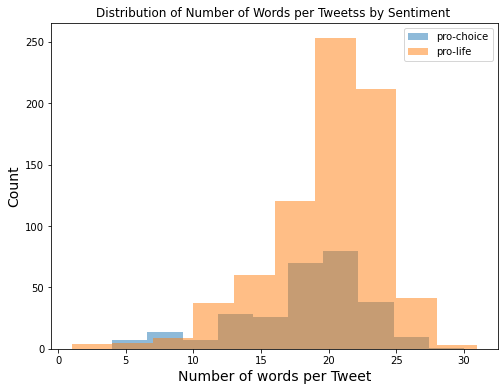

In [39]:

plt.figure(figsize=(8,6))
plt.hist(data1, bins=10, alpha=0.5, label="pro-choice")
plt.hist(data2, bins=10, alpha=0.5, label="pro-life")
plt.xlabel("Number of words per Tweet", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution of Number of Words per Tweetss by Sentiment ")
plt.legend(loc='upper right')